### 5 Crossfold Validation for 1-layer Model
##### 80:20 split for each crossfold validation step

In [1]:
import sys
sys.path.append('..')

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from core.getdata import *
from core.dataset import *
from core.network import *
from core.trainer import *
from core.visualization import *

from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

In [4]:
ligands = ["TNF", "R84", "PIC", "P3K", "FLA", "CpG", "FSL", "LPS", "UST"]
polarization = ["", "ib", "ig", "i0", "i3", "i4"]
replicas, size = 2, 1288

In [5]:
load_dir = '../models/cfv/'
save_dir = '../models/cfv/'
save_name = '1lkfcv'

In [6]:
#model parameters
input_size = 1 
hidden_sizes = 98
output_size = 9
num_layers = 1

#training parameters
n_epochs = 75
batch_size = 65
learning_rate = 1e-3
k = 5

#device
torch.cuda.is_available()
device = torch.device("cuda:0")

### Empty Model for CV
* only need to execute this cell once

In [7]:
# net = LSTM(input_size, hidden_sizes, output_size, num_layers=num_layers, device=device)
# net.train()
# model = LSTMTrainer(model=net, device=device)

In [8]:
# model.save('../models/' + 'mmempty.pth')

### 5F-CV 

In [9]:
path = '../models/mmempty.pth'

In [10]:
data1 = DatasetPolar(ligands, polarization, replicas, size)

In [11]:
net1 = LSTM(input_size, hidden_sizes, output_size, num_layers=num_layers, device=device)
net1.train()

LSTM(
  (lstm): LSTM(1, 98, batch_first=True)
  (fc1): Linear(in_features=98, out_features=9, bias=True)
)

In [12]:
model1 = LSTMTrainer(model=net1, device=device)

In [14]:
model1.kfcv(data1, k, path, save_name, batch_size=batch_size, n_epochs=n_epochs)

  1%|█                                                                                  | 1/75 [00:06<07:32,  6.12s/it]

Epoch 001: | Training Loss: 2.129757305032739 | Validation Loss: 2.154871597468296


  3%|██▏                                                                                | 2/75 [00:10<06:18,  5.18s/it]

Epoch 002: | Training Loss: 2.094858139892605 | Validation Loss: 2.1025185646297775


  4%|███▎                                                                               | 3/75 [00:15<05:48,  4.85s/it]

Epoch 003: | Training Loss: 2.0994340650667653 | Validation Loss: 2.198707696433379


  5%|████▍                                                                              | 4/75 [00:19<05:33,  4.70s/it]

Epoch 004: | Training Loss: 2.193845670635455 | Validation Loss: 2.15110006844886


  7%|█████▌                                                                             | 5/75 [00:24<05:23,  4.62s/it]

Epoch 005: | Training Loss: 2.1730909860022716 | Validation Loss: 2.1977583849541493


  8%|██████▋                                                                            | 6/75 [00:28<05:16,  4.59s/it]

Epoch 006: | Training Loss: 2.194367485347195 | Validation Loss: 2.183831054473592


  9%|███████▋                                                                           | 7/75 [00:33<05:11,  4.59s/it]

Epoch 007: | Training Loss: 2.162172192446539 | Validation Loss: 2.1174202711782724


 11%|████████▊                                                                          | 8/75 [00:37<05:06,  4.57s/it]

Epoch 008: | Training Loss: 2.0559821110741 | Validation Loss: 2.0420851389938424


 12%|█████████▉                                                                         | 9/75 [00:42<04:59,  4.54s/it]

Epoch 009: | Training Loss: 2.0094798928666338 | Validation Loss: 1.9932386312529304


 13%|██████████▉                                                                       | 10/75 [00:46<04:53,  4.52s/it]

Epoch 010: | Training Loss: 1.844648092149574 | Validation Loss: 1.7968858201927114


 15%|████████████                                                                      | 11/75 [00:51<04:49,  4.52s/it]

Epoch 011: | Training Loss: 1.7126626255356263 | Validation Loss: 1.6902133694318968


 16%|█████████████                                                                     | 12/75 [00:55<04:46,  4.55s/it]

Epoch 012: | Training Loss: 1.7306105101777014 | Validation Loss: 1.6755636384553998


 17%|██████████████▏                                                                   | 13/75 [01:00<04:41,  4.55s/it]

Epoch 013: | Training Loss: 1.7483880274763732 | Validation Loss: 1.7047745618864754


 19%|███████████████▎                                                                  | 14/75 [01:04<04:38,  4.57s/it]

Epoch 014: | Training Loss: 1.6976555709805443 | Validation Loss: 1.6532450802972383


 20%|████████████████▍                                                                 | 15/75 [01:09<04:34,  4.58s/it]

Epoch 015: | Training Loss: 1.651751605428268 | Validation Loss: 1.6256858611775336


 21%|█████████████████▍                                                                | 16/75 [01:14<04:31,  4.60s/it]

Epoch 016: | Training Loss: 1.6119143177415722 | Validation Loss: 1.5960385738132157


 23%|██████████████████▌                                                               | 17/75 [01:18<04:25,  4.58s/it]

Epoch 017: | Training Loss: 1.587548400336337 | Validation Loss: 1.5824491220099903


 24%|███████████████████▋                                                              | 18/75 [01:23<04:26,  4.67s/it]

Epoch 018: | Training Loss: 1.5705957575657656 | Validation Loss: 1.5599071210789903


 25%|████████████████████▊                                                             | 19/75 [01:28<04:23,  4.71s/it]

Epoch 019: | Training Loss: 1.597435923798062 | Validation Loss: 1.7660436730518518


 27%|█████████████████████▊                                                            | 20/75 [01:33<04:19,  4.73s/it]

Epoch 020: | Training Loss: 1.5924079089521248 | Validation Loss: 1.5595737912944545


 28%|██████████████████████▉                                                           | 21/75 [01:37<04:16,  4.75s/it]

Epoch 021: | Training Loss: 1.5569924790168477 | Validation Loss: 1.5395947644643695


 29%|████████████████████████                                                          | 22/75 [01:42<04:09,  4.71s/it]

Epoch 022: | Training Loss: 1.5226666359143837 | Validation Loss: 1.5325869455515782


 31%|█████████████████████████▏                                                        | 23/75 [01:47<04:02,  4.67s/it]

Epoch 023: | Training Loss: 1.5040968618938857 | Validation Loss: 1.5453160700396957


 32%|██████████████████████████▏                                                       | 24/75 [01:51<03:59,  4.69s/it]

Epoch 024: | Training Loss: 1.4884433796472638 | Validation Loss: 1.506054815287902


 33%|███████████████████████████▎                                                      | 25/75 [01:56<03:57,  4.75s/it]

Epoch 025: | Training Loss: 1.4698336330529684 | Validation Loss: 1.4692726781435101


 35%|████████████████████████████▍                                                     | 26/75 [02:01<03:52,  4.75s/it]

Epoch 026: | Training Loss: 1.450701521935864 | Validation Loss: 1.4550563174987508


 36%|█████████████████████████████▌                                                    | 27/75 [02:06<03:48,  4.76s/it]

Epoch 027: | Training Loss: 1.4341330838816189 | Validation Loss: 1.438011114285371


 37%|██████████████████████████████▌                                                   | 28/75 [02:10<03:41,  4.71s/it]

Epoch 028: | Training Loss: 1.4156119976645318 | Validation Loss: 1.4254942959714159


 39%|███████████████████████████████▋                                                  | 29/75 [02:15<03:34,  4.66s/it]

Epoch 029: | Training Loss: 1.421298476997937 | Validation Loss: 1.4572534750555164


 40%|████████████████████████████████▊                                                 | 30/75 [02:19<03:27,  4.61s/it]

Epoch 030: | Training Loss: 1.38594313669149 | Validation Loss: 1.4165467480632747


 41%|█████████████████████████████████▉                                                | 31/75 [02:24<03:22,  4.61s/it]

Epoch 031: | Training Loss: 1.3688754476955003 | Validation Loss: 1.3774694482856822


 43%|██████████████████████████████████▉                                               | 32/75 [02:29<03:17,  4.59s/it]

Epoch 032: | Training Loss: 1.357964496815873 | Validation Loss: 1.4064056104588731


 44%|████████████████████████████████████                                              | 33/75 [02:33<03:12,  4.58s/it]

Epoch 033: | Training Loss: 1.3381965547521537 | Validation Loss: 1.4063440767404074


 45%|█████████████████████████████████████▏                                            | 34/75 [02:38<03:07,  4.57s/it]

Epoch 034: | Training Loss: 1.3318527655623784 | Validation Loss: 1.3457949061260046


 47%|██████████████████████████████████████▎                                           | 35/75 [02:42<03:02,  4.56s/it]

Epoch 035: | Training Loss: 1.3122310818077247 | Validation Loss: 1.3488456077664812


 48%|███████████████████████████████████████▎                                          | 36/75 [02:47<02:57,  4.55s/it]

Epoch 036: | Training Loss: 1.3294314870906767 | Validation Loss: 1.3485832392612351


 49%|████████████████████████████████████████▍                                         | 37/75 [02:51<02:53,  4.56s/it]

Epoch 037: | Training Loss: 1.3055711599571682 | Validation Loss: 1.3305944207115707


 51%|█████████████████████████████████████████▌                                        | 38/75 [02:56<02:48,  4.56s/it]

Epoch 038: | Training Loss: 1.2891048311351616 | Validation Loss: 1.3345227316718236


 52%|██████████████████████████████████████████▋                                       | 39/75 [03:00<02:44,  4.56s/it]

Epoch 039: | Training Loss: 1.2863146815901605 | Validation Loss: 1.325211268997638


 53%|███████████████████████████████████████████▋                                      | 40/75 [03:05<02:39,  4.56s/it]

Epoch 040: | Training Loss: 1.2720080921861614 | Validation Loss: 1.31247932972195


 55%|████████████████████████████████████████████▊                                     | 41/75 [03:10<02:34,  4.55s/it]

Epoch 041: | Training Loss: 1.2632836104135647 | Validation Loss: 1.3630237428941459


 56%|█████████████████████████████████████████████▉                                    | 42/75 [03:14<02:29,  4.54s/it]

Epoch 042: | Training Loss: 1.2458654735411439 | Validation Loss: 1.2897777888819435


 57%|███████████████████████████████████████████████                                   | 43/75 [03:19<02:25,  4.54s/it]

Epoch 043: | Training Loss: 1.2449726755513209 | Validation Loss: 1.2932432009795


 59%|████████████████████████████████████████████████                                  | 44/75 [03:23<02:20,  4.54s/it]

Epoch 044: | Training Loss: 1.2356383288018058 | Validation Loss: 1.2882801717686876


 60%|█████████████████████████████████████████████████▏                                | 45/75 [03:28<02:16,  4.55s/it]

Epoch 045: | Training Loss: 1.2187475303762427 | Validation Loss: 1.250911072592869


 61%|██████████████████████████████████████████████████▎                               | 46/75 [03:32<02:11,  4.55s/it]

Epoch 046: | Training Loss: 1.2141379031622521 | Validation Loss: 1.2651609705987377


 63%|███████████████████████████████████████████████████▍                              | 47/75 [03:37<02:07,  4.54s/it]

Epoch 047: | Training Loss: 1.2152719565919627 | Validation Loss: 1.2621649331021532


 64%|████████████████████████████████████████████████████▍                             | 48/75 [03:41<02:02,  4.53s/it]

Epoch 048: | Training Loss: 1.1995191794828834 | Validation Loss: 1.250231706928984


 65%|█████████████████████████████████████████████████████▌                            | 49/75 [03:46<01:58,  4.56s/it]

Epoch 049: | Training Loss: 1.1852045823759008 | Validation Loss: 1.2545652063650505


 67%|██████████████████████████████████████████████████████▋                           | 50/75 [03:50<01:54,  4.56s/it]

Epoch 050: | Training Loss: 1.1857979030948933 | Validation Loss: 1.283041699188892


 68%|███████████████████████████████████████████████████████▊                          | 51/75 [03:55<01:49,  4.56s/it]

Epoch 051: | Training Loss: 1.193693481873129 | Validation Loss: 1.2540702722339987


 69%|████████████████████████████████████████████████████████▊                         | 52/75 [04:00<01:44,  4.55s/it]

Epoch 052: | Training Loss: 1.1726547782526953 | Validation Loss: 1.2369798822937725


 71%|█████████████████████████████████████████████████████████▉                        | 53/75 [04:04<01:39,  4.53s/it]

Epoch 053: | Training Loss: 1.1625190347293828 | Validation Loss: 1.234107003590771


 72%|███████████████████████████████████████████████████████████                       | 54/75 [04:09<01:35,  4.53s/it]

Epoch 054: | Training Loss: 1.1497786471916136 | Validation Loss: 1.2112482752755425


 73%|████████████████████████████████████████████████████████████▏                     | 55/75 [04:13<01:31,  4.55s/it]

Epoch 055: | Training Loss: 1.1430413752933528 | Validation Loss: 1.2105646682119815


 75%|█████████████████████████████████████████████████████████████▏                    | 56/75 [04:18<01:26,  4.56s/it]

Epoch 056: | Training Loss: 1.1618634207504932 | Validation Loss: 1.2710251412659048


 76%|██████████████████████████████████████████████████████████████▎                   | 57/75 [04:22<01:22,  4.56s/it]

Epoch 057: | Training Loss: 1.1495074539262558 | Validation Loss: 1.2114640037033046


 77%|███████████████████████████████████████████████████████████████▍                  | 58/75 [04:27<01:17,  4.55s/it]

Epoch 058: | Training Loss: 1.1228115658893763 | Validation Loss: 1.1979909564290092


 79%|████████████████████████████████████████████████████████████████▌                 | 59/75 [04:31<01:12,  4.55s/it]

Epoch 059: | Training Loss: 1.1211905964067048 | Validation Loss: 1.209251248947928


 80%|█████████████████████████████████████████████████████████████████▌                | 60/75 [04:36<01:08,  4.54s/it]

Epoch 060: | Training Loss: 1.1178198528484764 | Validation Loss: 1.199315016514787


 81%|██████████████████████████████████████████████████████████████████▋               | 61/75 [04:40<01:03,  4.54s/it]

Epoch 061: | Training Loss: 1.1084396737479718 | Validation Loss: 1.1823467447935978


 83%|███████████████████████████████████████████████████████████████████▊              | 62/75 [04:45<00:59,  4.55s/it]

Epoch 062: | Training Loss: 1.1104903355519349 | Validation Loss: 1.2023635748947892


 84%|████████████████████████████████████████████████████████████████████▉             | 63/75 [04:50<00:54,  4.55s/it]

Epoch 063: | Training Loss: 1.0980718497221715 | Validation Loss: 1.1901158002492422


 85%|█████████████████████████████████████████████████████████████████████▉            | 64/75 [04:54<00:50,  4.55s/it]

Epoch 064: | Training Loss: 1.0897410260600464 | Validation Loss: 1.2259630118018


 87%|███████████████████████████████████████████████████████████████████████           | 65/75 [04:59<00:45,  4.55s/it]

Epoch 065: | Training Loss: 1.0886199468764188 | Validation Loss: 1.1764483307009546


 88%|████████████████████████████████████████████████████████████████████████▏         | 66/75 [05:03<00:41,  4.56s/it]

Epoch 066: | Training Loss: 1.078823781110973 | Validation Loss: 1.3939406944212513


 89%|█████████████████████████████████████████████████████████████████████████▎        | 67/75 [05:08<00:36,  4.55s/it]

Epoch 067: | Training Loss: 1.086414047212244 | Validation Loss: 1.1731345001782212


 91%|██████████████████████████████████████████████████████████████████████████▎       | 68/75 [05:12<00:32,  4.57s/it]

Epoch 068: | Training Loss: 1.0777722409813204 | Validation Loss: 1.1761076244238382


 92%|███████████████████████████████████████████████████████████████████████████▍      | 69/75 [05:17<00:27,  4.57s/it]

Epoch 069: | Training Loss: 1.049781860801104 | Validation Loss: 1.1668834466243458


 93%|████████████████████████████████████████████████████████████████████████████▌     | 70/75 [05:22<00:22,  4.57s/it]

Epoch 070: | Training Loss: 1.049769310054378 | Validation Loss: 1.1911558918306762


 95%|█████████████████████████████████████████████████████████████████████████████▋    | 71/75 [05:26<00:18,  4.57s/it]

Epoch 071: | Training Loss: 1.0432839951364794 | Validation Loss: 1.2595115223220577


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 72/75 [05:31<00:13,  4.57s/it]

Epoch 072: | Training Loss: 1.0530752903111626 | Validation Loss: 1.1598332217920606


 97%|███████████████████████████████████████████████████████████████████████████████▊  | 73/75 [05:35<00:09,  4.56s/it]

Epoch 073: | Training Loss: 1.046369638050271 | Validation Loss: 1.1758811390288522


 99%|████████████████████████████████████████████████████████████████████████████████▉ | 74/75 [05:40<00:04,  4.59s/it]

Epoch 074: | Training Loss: 1.0355835606422379 | Validation Loss: 1.13666273556023


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [05:44<00:00,  4.60s/it]

Epoch 075: | Training Loss: 1.0393297485659057 | Validation Loss: 1.9291725821584185



  1%|█                                                                                  | 1/75 [00:04<05:38,  4.58s/it]

Epoch 001: | Training Loss: 2.168613394844198 | Validation Loss: 2.1882818391389938


  3%|██▏                                                                                | 2/75 [00:09<05:33,  4.56s/it]

Epoch 002: | Training Loss: 2.146029212625227 | Validation Loss: 2.0923005743561505


  4%|███▎                                                                               | 3/75 [00:13<05:27,  4.55s/it]

Epoch 003: | Training Loss: 2.0637697901959733 | Validation Loss: 2.018617595467612


  5%|████▍                                                                              | 4/75 [00:18<05:22,  4.54s/it]

Epoch 004: | Training Loss: 1.9627736056240919 | Validation Loss: 1.923392187769168


  7%|█████▌                                                                             | 5/75 [00:22<05:18,  4.55s/it]

Epoch 005: | Training Loss: 1.844940160479501 | Validation Loss: 1.7819434655046908


  8%|██████▋                                                                            | 6/75 [00:27<05:14,  4.56s/it]

Epoch 006: | Training Loss: 1.7491241706030392 | Validation Loss: 1.748134938912971


  9%|███████▋                                                                           | 7/75 [00:31<05:09,  4.55s/it]

Epoch 007: | Training Loss: 1.6884867912419488 | Validation Loss: 1.6959039919844299


 11%|████████▊                                                                          | 8/75 [00:36<05:05,  4.55s/it]

Epoch 008: | Training Loss: 1.6476282336723025 | Validation Loss: 1.632153523302524


 12%|█████████▉                                                                         | 9/75 [00:40<05:00,  4.55s/it]

Epoch 009: | Training Loss: 1.6314691002959403 | Validation Loss: 1.6386986391566625


 13%|██████████▉                                                                       | 10/75 [00:45<04:55,  4.54s/it]

Epoch 010: | Training Loss: 1.6039499923169056 | Validation Loss: 1.6070782375112873


 15%|████████████                                                                      | 11/75 [00:50<04:50,  4.54s/it]

Epoch 011: | Training Loss: 1.5655078738927841 | Validation Loss: 1.567828870822336


 16%|█████████████                                                                     | 12/75 [00:54<04:46,  4.55s/it]

Epoch 012: | Training Loss: 1.5364305712630815 | Validation Loss: 1.534845946548141


 17%|██████████████▏                                                                   | 13/75 [00:59<04:44,  4.59s/it]

Epoch 013: | Training Loss: 1.509373640345636 | Validation Loss: 1.5136313310293394


 19%|███████████████▎                                                                  | 14/75 [01:03<04:39,  4.59s/it]

Epoch 014: | Training Loss: 1.4877226788585431 | Validation Loss: 1.487887153558642


 20%|████████████████▍                                                                 | 15/75 [01:08<04:34,  4.58s/it]

Epoch 015: | Training Loss: 1.4637688767408656 | Validation Loss: 1.4818077945263586


 21%|█████████████████▍                                                                | 16/75 [01:12<04:29,  4.57s/it]

Epoch 016: | Training Loss: 1.4403609735804184 | Validation Loss: 1.4439887042357542


 23%|██████████████████▌                                                               | 17/75 [01:17<04:24,  4.57s/it]

Epoch 017: | Training Loss: 1.4241339548308158 | Validation Loss: 1.4424725236179672


 24%|███████████████████▋                                                              | 18/75 [01:22<04:20,  4.57s/it]

Epoch 018: | Training Loss: 1.5372751804991303 | Validation Loss: 1.47410804757448


 25%|████████████████████▊                                                             | 19/75 [01:26<04:16,  4.57s/it]

Epoch 019: | Training Loss: 1.4767926074912614 | Validation Loss: 1.4659420608360076


 27%|█████████████████████▊                                                            | 20/75 [01:31<04:11,  4.58s/it]

Epoch 020: | Training Loss: 1.866984502038109 | Validation Loss: 2.207498427863433


 28%|██████████████████████▉                                                           | 21/75 [01:35<04:06,  4.57s/it]

Epoch 021: | Training Loss: 2.193146669976065 | Validation Loss: 2.1343348109833546


 29%|████████████████████████                                                          | 22/75 [01:40<04:02,  4.57s/it]

Epoch 022: | Training Loss: 2.1099575684170855 | Validation Loss: 2.0729621364691546


 31%|█████████████████████████▏                                                        | 23/75 [01:44<03:57,  4.58s/it]

Epoch 023: | Training Loss: 2.104530548102388 | Validation Loss: 2.0631906936101823


 32%|██████████████████████████▏                                                       | 24/75 [01:49<03:53,  4.57s/it]

Epoch 024: | Training Loss: 2.04796565233547 | Validation Loss: 2.02872216590097


 33%|███████████████████████████▎                                                      | 25/75 [01:54<03:48,  4.56s/it]

Epoch 025: | Training Loss: 2.0115479236451264 | Validation Loss: 1.9940387757025033


 35%|████████████████████████████▍                                                     | 26/75 [01:58<03:43,  4.56s/it]

Epoch 026: | Training Loss: 1.9619430538928397 | Validation Loss: 1.9313846871117566


 36%|█████████████████████████████▌                                                    | 27/75 [02:03<03:38,  4.56s/it]

Epoch 027: | Training Loss: 1.8892049269977016 | Validation Loss: 1.8629777643168084


 37%|██████████████████████████████▌                                                   | 28/75 [02:07<03:33,  4.55s/it]

Epoch 028: | Training Loss: 1.8357313927088943 | Validation Loss: 1.8412516590590788


 39%|███████████████████████████████▋                                                  | 29/75 [02:12<03:29,  4.55s/it]

Epoch 029: | Training Loss: 1.7783882314356687 | Validation Loss: 1.763288517421651


 40%|████████████████████████████████▊                                                 | 30/75 [02:16<03:24,  4.55s/it]

Epoch 030: | Training Loss: 1.7316642180781499 | Validation Loss: 1.7418756713376982


 41%|█████████████████████████████████▉                                                | 31/75 [02:21<03:20,  4.55s/it]

Epoch 031: | Training Loss: 1.7043741864857274 | Validation Loss: 1.6949315048823848


 43%|██████████████████████████████████▉                                               | 32/75 [02:25<03:16,  4.56s/it]

Epoch 032: | Training Loss: 1.677846069647887 | Validation Loss: 1.677889742583872


 44%|████████████████████████████████████                                              | 33/75 [02:30<03:11,  4.55s/it]

Epoch 033: | Training Loss: 1.6530142938979318 | Validation Loss: 1.6592857191495807


 45%|█████████████████████████████████████▏                                            | 34/75 [02:35<03:06,  4.56s/it]

Epoch 034: | Training Loss: 1.6259740848686093 | Validation Loss: 1.6186145900565887


 47%|██████████████████████████████████████▎                                           | 35/75 [02:39<03:02,  4.55s/it]

Epoch 035: | Training Loss: 1.6036700875124084 | Validation Loss: 1.6332178271819497


 48%|███████████████████████████████████████▎                                          | 36/75 [02:44<02:57,  4.55s/it]

Epoch 036: | Training Loss: 1.5804454943287038 | Validation Loss: 1.59523318359785


 49%|████████████████████████████████████████▍                                         | 37/75 [02:48<02:54,  4.58s/it]

Epoch 037: | Training Loss: 1.5602489868614162 | Validation Loss: 1.565987188682378


 51%|█████████████████████████████████████████▌                                        | 38/75 [02:53<02:49,  4.58s/it]

Epoch 038: | Training Loss: 1.5428495255307617 | Validation Loss: 1.561233530534762


 52%|██████████████████████████████████████████▋                                       | 39/75 [02:57<02:44,  4.58s/it]

Epoch 039: | Training Loss: 1.5226787852349681 | Validation Loss: 1.5166918624227292


 53%|███████████████████████████████████████████▋                                      | 40/75 [03:02<02:39,  4.57s/it]

Epoch 040: | Training Loss: 1.5098275706589779 | Validation Loss: 1.513632122601304


 55%|████████████████████████████████████████████▊                                     | 41/75 [03:07<02:34,  4.56s/it]

Epoch 041: | Training Loss: 1.491859736843644 | Validation Loss: 1.5021483641918574


 56%|█████████████████████████████████████████████▉                                    | 42/75 [03:11<02:30,  4.55s/it]

Epoch 042: | Training Loss: 1.474056461286322 | Validation Loss: 1.5071482067910311


 57%|███████████████████████████████████████████████                                   | 43/75 [03:16<02:25,  4.54s/it]

Epoch 043: | Training Loss: 1.4648894195523217 | Validation Loss: 1.476068004826519


 59%|████████████████████████████████████████████████                                  | 44/75 [03:20<02:20,  4.55s/it]

Epoch 044: | Training Loss: 1.450910605420576 | Validation Loss: 1.470353644584941


 60%|█████████████████████████████████████████████████▏                                | 45/75 [03:25<02:16,  4.55s/it]

Epoch 045: | Training Loss: 1.4401066276793169 | Validation Loss: 1.452489138206589


 61%|██████████████████████████████████████████████████▎                               | 46/75 [03:29<02:12,  4.55s/it]

Epoch 046: | Training Loss: 1.4341486491889597 | Validation Loss: 1.4456160837244765


 63%|███████████████████████████████████████████████████▍                              | 47/75 [03:34<02:07,  4.55s/it]

Epoch 047: | Training Loss: 1.4304157923036647 | Validation Loss: 1.4280004863427065


 64%|████████████████████████████████████████████████████▍                             | 48/75 [03:38<02:03,  4.56s/it]

Epoch 048: | Training Loss: 1.4039259688040922 | Validation Loss: 1.415010394894074


 65%|█████████████████████████████████████████████████████▌                            | 49/75 [03:43<01:58,  4.56s/it]

Epoch 049: | Training Loss: 1.3951449342698694 | Validation Loss: 1.4011357086841192


 67%|██████████████████████████████████████████████████████▋                           | 50/75 [03:48<01:53,  4.55s/it]

Epoch 050: | Training Loss: 1.3827995689951371 | Validation Loss: 1.4103438046491035


 68%|███████████████████████████████████████████████████████▊                          | 51/75 [03:52<01:49,  4.56s/it]

Epoch 051: | Training Loss: 1.369801928924623 | Validation Loss: 1.3811848670522744


 69%|████████████████████████████████████████████████████████▊                         | 52/75 [03:57<01:45,  4.58s/it]

Epoch 052: | Training Loss: 1.3584693946013942 | Validation Loss: 1.3810505861433866


 71%|█████████████████████████████████████████████████████████▉                        | 53/75 [04:01<01:40,  4.57s/it]

Epoch 053: | Training Loss: 1.3511745401214217 | Validation Loss: 1.361724764944237


 72%|███████████████████████████████████████████████████████████                       | 54/75 [04:06<01:35,  4.56s/it]

Epoch 054: | Training Loss: 1.3405512886069646 | Validation Loss: 1.358837581683542


 73%|████████████████████████████████████████████████████████████▏                     | 55/75 [04:10<01:31,  4.56s/it]

Epoch 055: | Training Loss: 1.3246985425319626 | Validation Loss: 1.3801678976165914


 75%|█████████████████████████████████████████████████████████████▏                    | 56/75 [04:15<01:26,  4.57s/it]

Epoch 056: | Training Loss: 1.31421792479319 | Validation Loss: 1.3518958013748454


 76%|██████████████████████████████████████████████████████████████▎                   | 57/75 [04:20<01:22,  4.57s/it]

Epoch 057: | Training Loss: 1.3062993434962826 | Validation Loss: 1.3288778723957382


 77%|███████████████████████████████████████████████████████████████▍                  | 58/75 [04:24<01:17,  4.56s/it]

Epoch 058: | Training Loss: 1.2930415733673861 | Validation Loss: 1.3630533552615443


 79%|████████████████████████████████████████████████████████████████▌                 | 59/75 [04:29<01:12,  4.56s/it]

Epoch 059: | Training Loss: 1.282863832801302 | Validation Loss: 1.3143267041054842


 80%|█████████████████████████████████████████████████████████████████▌                | 60/75 [04:33<01:08,  4.56s/it]

Epoch 060: | Training Loss: 1.2740315414756258 | Validation Loss: 1.3198518903456002


 81%|██████████████████████████████████████████████████████████████████▋               | 61/75 [04:38<01:03,  4.56s/it]

Epoch 061: | Training Loss: 1.2676258402589327 | Validation Loss: 1.3062640297635693


 83%|███████████████████████████████████████████████████████████████████▊              | 62/75 [04:42<00:59,  4.59s/it]

Epoch 062: | Training Loss: 1.2580878974121308 | Validation Loss: 1.3011488101192723


 84%|████████████████████████████████████████████████████████████████████▉             | 63/75 [04:47<00:55,  4.60s/it]

Epoch 063: | Training Loss: 1.2439988960868844 | Validation Loss: 1.3077765909310812


 85%|█████████████████████████████████████████████████████████████████████▉            | 64/75 [04:52<00:50,  4.59s/it]

Epoch 064: | Training Loss: 1.2371663706046399 | Validation Loss: 1.2905530990841232


 87%|███████████████████████████████████████████████████████████████████████           | 65/75 [04:56<00:45,  4.57s/it]

Epoch 065: | Training Loss: 1.2219582757799425 | Validation Loss: 1.27710677446606


 88%|████████████████████████████████████████████████████████████████████████▏         | 66/75 [05:01<00:41,  4.57s/it]

Epoch 066: | Training Loss: 1.221272832043817 | Validation Loss: 1.2699079218311844


 89%|█████████████████████████████████████████████████████████████████████████▎        | 67/75 [05:05<00:36,  4.57s/it]

Epoch 067: | Training Loss: 1.2111910100434429 | Validation Loss: 1.2612635089415256


 91%|██████████████████████████████████████████████████████████████████████████▎       | 68/75 [05:10<00:32,  4.58s/it]

Epoch 068: | Training Loss: 1.2002088462359437 | Validation Loss: 1.2555878975681056


 92%|███████████████████████████████████████████████████████████████████████████▍      | 69/75 [05:14<00:27,  4.59s/it]

Epoch 069: | Training Loss: 1.1989974207549452 | Validation Loss: 1.25663799131028


 93%|████████████████████████████████████████████████████████████████████████████▌     | 70/75 [05:19<00:22,  4.59s/it]

Epoch 070: | Training Loss: 1.193894072322645 | Validation Loss: 1.2445204678539918


 95%|█████████████████████████████████████████████████████████████████████████████▋    | 71/75 [05:24<00:18,  4.58s/it]

Epoch 071: | Training Loss: 1.174564394647273 | Validation Loss: 1.2406737506389618


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 72/75 [05:28<00:13,  4.57s/it]

Epoch 072: | Training Loss: 1.1725118814088473 | Validation Loss: 1.2744019552368984


 97%|███████████████████████████████████████████████████████████████████████████████▊  | 73/75 [05:33<00:09,  4.60s/it]

Epoch 073: | Training Loss: 1.168649063558779 | Validation Loss: 1.2239198375528104


 99%|████████████████████████████████████████████████████████████████████████████████▉ | 74/75 [05:38<00:04,  4.66s/it]

Epoch 074: | Training Loss: 1.1569264378642368 | Validation Loss: 1.2641148388942824


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [05:42<00:00,  4.57s/it]

Epoch 075: | Training Loss: 1.1578580616651295 | Validation Loss: 1.2461738280046766



  1%|█                                                                                  | 1/75 [00:04<05:43,  4.64s/it]

Epoch 001: | Training Loss: 2.179796059276456 | Validation Loss: 2.1891287966309307


  3%|██▏                                                                                | 2/75 [00:09<05:38,  4.63s/it]

Epoch 002: | Training Loss: 2.1081549120005048 | Validation Loss: 2.0621472491282167


  4%|███▎                                                                               | 3/75 [00:13<05:31,  4.61s/it]

Epoch 003: | Training Loss: 2.1979337940427746 | Validation Loss: 2.193864829072328


  5%|████▍                                                                              | 4/75 [00:18<05:25,  4.59s/it]

Epoch 004: | Training Loss: 2.119147373276336 | Validation Loss: 2.0610209870561262


  7%|█████▌                                                                             | 5/75 [00:22<05:21,  4.59s/it]

Epoch 005: | Training Loss: 2.0594000728609405 | Validation Loss: 2.03847277721512


  8%|██████▋                                                                            | 6/75 [00:27<05:16,  4.59s/it]

Epoch 006: | Training Loss: 2.0137995144474172 | Validation Loss: 1.958671214981614


  9%|███████▋                                                                           | 7/75 [00:32<05:12,  4.60s/it]

Epoch 007: | Training Loss: 1.887850830627379 | Validation Loss: 1.8333995191850394


 11%|████████▊                                                                          | 8/75 [00:36<05:08,  4.61s/it]

Epoch 008: | Training Loss: 1.8590847599172147 | Validation Loss: 1.8070621289939524


 12%|█████████▉                                                                         | 9/75 [00:41<05:03,  4.60s/it]

Epoch 009: | Training Loss: 1.7696018632605812 | Validation Loss: 1.7561066262075835


 13%|██████████▉                                                                       | 10/75 [00:45<04:58,  4.59s/it]

Epoch 010: | Training Loss: 1.7241166843989184 | Validation Loss: 1.7047728389223045


 15%|████████████                                                                      | 11/75 [00:50<04:52,  4.57s/it]

Epoch 011: | Training Loss: 1.6849517740100344 | Validation Loss: 1.6802233257026316


 16%|█████████████                                                                     | 12/75 [00:55<04:48,  4.57s/it]

Epoch 012: | Training Loss: 1.6602514925125604 | Validation Loss: 1.8640335558730865


 17%|██████████████▏                                                                   | 13/75 [00:59<04:44,  4.58s/it]

Epoch 013: | Training Loss: 1.7056864011231985 | Validation Loss: 1.6732930123248948


 19%|███████████████▎                                                                  | 14/75 [01:04<04:44,  4.66s/it]

Epoch 014: | Training Loss: 1.6520404471693753 | Validation Loss: 1.595805146426798


 20%|████████████████▍                                                                 | 15/75 [01:09<04:41,  4.70s/it]

Epoch 015: | Training Loss: 1.58843340870933 | Validation Loss: 1.576754061418159


 21%|█████████████████▍                                                                | 16/75 [01:14<04:37,  4.71s/it]

Epoch 016: | Training Loss: 1.5549169316470066 | Validation Loss: 1.546735608132086


 23%|██████████████████▌                                                               | 17/75 [01:18<04:32,  4.70s/it]

Epoch 017: | Training Loss: 1.5382241661024985 | Validation Loss: 1.5115870365472597


 24%|███████████████████▋                                                              | 18/75 [01:23<04:27,  4.69s/it]

Epoch 018: | Training Loss: 1.5107154747314542 | Validation Loss: 1.5166616033170826


 25%|████████████████████▊                                                             | 19/75 [01:28<04:22,  4.68s/it]

Epoch 019: | Training Loss: 1.4945877981241618 | Validation Loss: 1.4863094537057608


 27%|█████████████████████▊                                                            | 20/75 [01:32<04:16,  4.66s/it]

Epoch 020: | Training Loss: 1.4800214054428529 | Validation Loss: 1.4821266899599093


 28%|██████████████████████▉                                                           | 21/75 [01:37<04:11,  4.65s/it]

Epoch 021: | Training Loss: 1.4591248791630023 | Validation Loss: 1.4695121723914815


 29%|████████████████████████                                                          | 22/75 [01:41<04:05,  4.63s/it]

Epoch 022: | Training Loss: 1.6122652201730514 | Validation Loss: 1.7440674293821103


 31%|█████████████████████████▏                                                        | 23/75 [01:46<04:00,  4.63s/it]

Epoch 023: | Training Loss: 1.710899651329094 | Validation Loss: 1.6073185294588035


 32%|██████████████████████████▏                                                       | 24/75 [01:51<03:56,  4.63s/it]

Epoch 024: | Training Loss: 1.9694147341162245 | Validation Loss: 2.128522394973541


 33%|███████████████████████████▎                                                      | 25/75 [01:55<03:51,  4.63s/it]

Epoch 025: | Training Loss: 2.1049612408207956 | Validation Loss: 2.082317472061264


 35%|████████████████████████████▍                                                     | 26/75 [02:00<03:46,  4.62s/it]

Epoch 026: | Training Loss: 2.1413025786386473 | Validation Loss: 2.174622257179189


 36%|█████████████████████████████▌                                                    | 27/75 [02:05<03:41,  4.62s/it]

Epoch 027: | Training Loss: 2.1409494467427796 | Validation Loss: 2.182614525901937


 37%|██████████████████████████████▌                                                   | 28/75 [02:09<03:36,  4.61s/it]

Epoch 028: | Training Loss: 2.128089315841131 | Validation Loss: 2.1149997176410995


 39%|███████████████████████████████▋                                                  | 29/75 [02:14<03:31,  4.60s/it]

Epoch 029: | Training Loss: 2.0312080081099664 | Validation Loss: 1.9612178356848031


 40%|████████████████████████████████▊                                                 | 30/75 [02:18<03:27,  4.60s/it]

Epoch 030: | Training Loss: 1.8899773633647188 | Validation Loss: 1.855293294536733


 41%|█████████████████████████████████▉                                                | 31/75 [02:23<03:22,  4.61s/it]

Epoch 031: | Training Loss: 1.7812777472155117 | Validation Loss: 1.7436539514042506


 43%|██████████████████████████████████▉                                               | 32/75 [02:27<03:17,  4.60s/it]

Epoch 032: | Training Loss: 1.7155176044624543 | Validation Loss: 1.6848372204281459


 44%|████████████████████████████████████                                              | 33/75 [02:32<03:13,  4.61s/it]

Epoch 033: | Training Loss: 1.6454448069088927 | Validation Loss: 1.625926257850968


 45%|█████████████████████████████████████▏                                            | 34/75 [02:37<03:09,  4.62s/it]

Epoch 034: | Training Loss: 1.6290988728543307 | Validation Loss: 1.6056751770393871


 47%|██████████████████████████████████████▎                                           | 35/75 [02:41<03:03,  4.60s/it]

Epoch 035: | Training Loss: 1.6521043468301542 | Validation Loss: 1.6210997461158538


 48%|███████████████████████████████████████▎                                          | 36/75 [02:46<02:58,  4.58s/it]

Epoch 036: | Training Loss: 1.6019622690488244 | Validation Loss: 1.5803603652481721


 49%|████████████████████████████████████████▍                                         | 37/75 [02:50<02:53,  4.57s/it]

Epoch 037: | Training Loss: 1.5392758534333417 | Validation Loss: 1.5334248765606746


 51%|█████████████████████████████████████████▌                                        | 38/75 [02:55<02:49,  4.59s/it]

Epoch 038: | Training Loss: 1.545891780719579 | Validation Loss: 1.5176928489007682


 52%|██████████████████████████████████████████▋                                       | 39/75 [03:00<02:46,  4.61s/it]

Epoch 039: | Training Loss: 1.5011438308196647 | Validation Loss: 1.4815326522443897


 53%|███████████████████████████████████████████▋                                      | 40/75 [03:04<02:41,  4.61s/it]

Epoch 040: | Training Loss: 1.4728142972861495 | Validation Loss: 1.473427008245593


 55%|████████████████████████████████████████████▊                                     | 41/75 [03:09<02:36,  4.61s/it]

Epoch 041: | Training Loss: 1.4464947798541774 | Validation Loss: 1.4955555768770592


 56%|█████████████████████████████████████████████▉                                    | 42/75 [03:14<02:32,  4.61s/it]

Epoch 042: | Training Loss: 1.4305915608305797 | Validation Loss: 1.447834033275319


 57%|███████████████████████████████████████████████                                   | 43/75 [03:18<02:28,  4.64s/it]

Epoch 043: | Training Loss: 1.4105630366601676 | Validation Loss: 1.4255430341881012


 59%|████████████████████████████████████████████████                                  | 44/75 [03:23<02:25,  4.70s/it]

Epoch 044: | Training Loss: 1.3879223903205906 | Validation Loss: 1.3891743878337826


 60%|█████████████████████████████████████████████████▏                                | 45/75 [03:28<02:21,  4.71s/it]

Epoch 045: | Training Loss: 1.368272133380453 | Validation Loss: 1.3784217333125177


 61%|██████████████████████████████████████████████████▎                               | 46/75 [03:32<02:15,  4.69s/it]

Epoch 046: | Training Loss: 1.3880014322071432 | Validation Loss: 1.3685209767840734


 63%|███████████████████████████████████████████████████▍                              | 47/75 [03:37<02:10,  4.67s/it]

Epoch 047: | Training Loss: 1.3368885561684583 | Validation Loss: 1.335397816149988


 64%|████████████████████████████████████████████████████▍                             | 48/75 [03:42<02:05,  4.64s/it]

Epoch 048: | Training Loss: 1.353300865913663 | Validation Loss: 1.322990019187749


 65%|█████████████████████████████████████████████████████▌                            | 49/75 [03:46<02:00,  4.62s/it]

Epoch 049: | Training Loss: 1.3010276551140803 | Validation Loss: 1.3262364613675626


 67%|██████████████████████████████████████████████████████▋                           | 50/75 [03:51<01:55,  4.60s/it]

Epoch 050: | Training Loss: 1.2880396239946936 | Validation Loss: 1.2857393444141494


 68%|███████████████████████████████████████████████████████▊                          | 51/75 [03:55<01:50,  4.62s/it]

Epoch 051: | Training Loss: 1.2798971002486264 | Validation Loss: 1.2958630167435263


 69%|████████████████████████████████████████████████████████▊                         | 52/75 [04:00<01:46,  4.65s/it]

Epoch 052: | Training Loss: 1.2729565387713575 | Validation Loss: 1.2896815103905224


 71%|█████████████████████████████████████████████████████████▉                        | 53/75 [04:05<01:41,  4.63s/it]

Epoch 053: | Training Loss: 1.2519862112180096 | Validation Loss: 1.2759812268141275


 72%|███████████████████████████████████████████████████████████                       | 54/75 [04:09<01:36,  4.62s/it]

Epoch 054: | Training Loss: 1.2350557608025097 | Validation Loss: 1.2707436402267385


 73%|████████████████████████████████████████████████████████████▏                     | 55/75 [04:14<01:32,  4.60s/it]

Epoch 055: | Training Loss: 1.2335240939092413 | Validation Loss: 1.2865019836158396


 75%|█████████████████████████████████████████████████████████████▏                    | 56/75 [04:19<01:27,  4.62s/it]

Epoch 056: | Training Loss: 1.217935961262088 | Validation Loss: 1.2521798730453597


 76%|██████████████████████████████████████████████████████████████▎                   | 57/75 [04:23<01:23,  4.62s/it]

Epoch 057: | Training Loss: 1.2087727514939888 | Validation Loss: 1.2633324889379127


 77%|███████████████████████████████████████████████████████████████▍                  | 58/75 [04:28<01:18,  4.64s/it]

Epoch 058: | Training Loss: 1.1951295837899234 | Validation Loss: 1.254332705078838


 79%|████████████████████████████████████████████████████████████████▌                 | 59/75 [04:32<01:14,  4.64s/it]

Epoch 059: | Training Loss: 1.1892209473614381 | Validation Loss: 1.243273422261265


 80%|█████████████████████████████████████████████████████████████████▌                | 60/75 [04:37<01:09,  4.64s/it]

Epoch 060: | Training Loss: 1.1866633404638165 | Validation Loss: 1.2202409597757822


 81%|██████████████████████████████████████████████████████████████████▋               | 61/75 [04:42<01:04,  4.62s/it]

Epoch 061: | Training Loss: 1.1760503898992716 | Validation Loss: 1.2411893166114236


 83%|███████████████████████████████████████████████████████████████████▊              | 62/75 [04:46<00:59,  4.60s/it]

Epoch 062: | Training Loss: 1.1666612368877802 | Validation Loss: 1.2226887963642583


 84%|████████████████████████████████████████████████████████████████████▉             | 63/75 [04:51<00:54,  4.58s/it]

Epoch 063: | Training Loss: 1.156561807703192 | Validation Loss: 1.2140399156329789


 85%|█████████████████████████████████████████████████████████████████████▉            | 64/75 [04:55<00:50,  4.59s/it]

Epoch 064: | Training Loss: 1.1492371174776665 | Validation Loss: 1.2031519348933317


 87%|███████████████████████████████████████████████████████████████████████           | 65/75 [05:00<00:45,  4.58s/it]

Epoch 065: | Training Loss: 1.1356094188500787 | Validation Loss: 1.1937825080947342


 88%|████████████████████████████████████████████████████████████████████████▏         | 66/75 [05:05<00:41,  4.61s/it]

Epoch 066: | Training Loss: 1.1281822736714489 | Validation Loss: 1.2199873091461502


 89%|█████████████████████████████████████████████████████████████████████████▎        | 67/75 [05:09<00:36,  4.61s/it]

Epoch 067: | Training Loss: 1.1228981518021255 | Validation Loss: 1.2090363588845618


 91%|██████████████████████████████████████████████████████████████████████████▎       | 68/75 [05:14<00:32,  4.60s/it]

Epoch 068: | Training Loss: 1.1117052099554339 | Validation Loss: 1.1962525961555053


 92%|███████████████████████████████████████████████████████████████████████████▍      | 69/75 [05:18<00:27,  4.59s/it]

Epoch 069: | Training Loss: 1.1115066597116328 | Validation Loss: 1.1960078502926872


 93%|████████████████████████████████████████████████████████████████████████████▌     | 70/75 [05:23<00:23,  4.61s/it]

Epoch 070: | Training Loss: 1.1057522646456122 | Validation Loss: 1.1737825720109671


 95%|█████████████████████████████████████████████████████████████████████████████▋    | 71/75 [05:28<00:18,  4.62s/it]

Epoch 071: | Training Loss: 1.0885029258293526 | Validation Loss: 1.17147829877996


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 72/75 [05:32<00:13,  4.61s/it]

Epoch 072: | Training Loss: 1.0849888467482318 | Validation Loss: 1.1906662430161628


 97%|███████████████████████████████████████████████████████████████████████████████▊  | 73/75 [05:37<00:09,  4.60s/it]

Epoch 073: | Training Loss: 1.0755329679384409 | Validation Loss: 1.1728236912009873


 99%|████████████████████████████████████████████████████████████████████████████████▉ | 74/75 [05:41<00:04,  4.59s/it]

Epoch 074: | Training Loss: 1.0702261447767232 | Validation Loss: 1.199732414472883


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [05:46<00:00,  4.62s/it]

Epoch 075: | Training Loss: 1.0617945674702385 | Validation Loss: 1.1658460155268695



  1%|█                                                                                  | 1/75 [00:04<05:42,  4.62s/it]

Epoch 001: | Training Loss: 2.140326379894096 | Validation Loss: 2.1533747889171138


  3%|██▏                                                                                | 2/75 [00:09<05:40,  4.67s/it]

Epoch 002: | Training Loss: 2.138005719285145 | Validation Loss: 2.114243100736743


  4%|███▎                                                                               | 3/75 [00:13<05:36,  4.67s/it]

Epoch 003: | Training Loss: 2.14021232515295 | Validation Loss: 2.1819493948856246


  5%|████▍                                                                              | 4/75 [00:18<05:30,  4.65s/it]

Epoch 004: | Training Loss: 2.161493557775132 | Validation Loss: 2.130427565530082


  7%|█████▌                                                                             | 5/75 [00:23<05:27,  4.68s/it]

Epoch 005: | Training Loss: 2.094765224467928 | Validation Loss: 2.055942216209162


  8%|██████▋                                                                            | 6/75 [00:27<05:21,  4.65s/it]

Epoch 006: | Training Loss: 2.0122977238949216 | Validation Loss: 1.9699697021011995


  9%|███████▋                                                                           | 7/75 [00:32<05:15,  4.64s/it]

Epoch 007: | Training Loss: 1.848525822858944 | Validation Loss: 1.766408129273174


 11%|████████▊                                                                          | 8/75 [00:37<05:10,  4.63s/it]

Epoch 008: | Training Loss: 1.7616577833612388 | Validation Loss: 1.7202621687238462


 12%|█████████▉                                                                         | 9/75 [00:41<05:07,  4.66s/it]

Epoch 009: | Training Loss: 1.720549866278595 | Validation Loss: 1.6845547562447665


 13%|██████████▉                                                                       | 10/75 [00:46<05:01,  4.64s/it]

Epoch 010: | Training Loss: 1.6669668090120655 | Validation Loss: 1.6642606765310342


 15%|████████████                                                                      | 11/75 [00:51<04:56,  4.64s/it]

Epoch 011: | Training Loss: 1.7062982468404502 | Validation Loss: 1.6898878411711933


 16%|█████████████                                                                     | 12/75 [00:55<04:51,  4.62s/it]

Epoch 012: | Training Loss: 1.648383541363422 | Validation Loss: 1.6331460531626907


 17%|██████████████▏                                                                   | 13/75 [01:00<04:45,  4.61s/it]

Epoch 013: | Training Loss: 1.6073019536577653 | Validation Loss: 1.5756910499011245


 19%|███████████████▎                                                                  | 14/75 [01:04<04:40,  4.60s/it]

Epoch 014: | Training Loss: 1.583246051429588 | Validation Loss: 1.5585849457812087


 20%|████████████████▍                                                                 | 15/75 [01:09<04:35,  4.59s/it]

Epoch 015: | Training Loss: 1.5618616292409808 | Validation Loss: 1.557499158048184


 21%|█████████████████▍                                                                | 16/75 [01:14<04:31,  4.61s/it]

Epoch 016: | Training Loss: 1.6247119909134982 | Validation Loss: 1.716711286072419


 23%|██████████████████▌                                                               | 17/75 [01:18<04:28,  4.63s/it]

Epoch 017: | Training Loss: 1.6469623711064598 | Validation Loss: 1.5809091892197868


 24%|███████████████████▋                                                              | 18/75 [01:23<04:24,  4.64s/it]

Epoch 018: | Training Loss: 1.5600742589090473 | Validation Loss: 1.5682670992111492


 25%|████████████████████▊                                                             | 19/75 [01:28<04:20,  4.65s/it]

Epoch 019: | Training Loss: 1.5396542051963718 | Validation Loss: 1.5141681388159778


 27%|█████████████████████▊                                                            | 20/75 [01:32<04:14,  4.63s/it]

Epoch 020: | Training Loss: 1.5137726927750579 | Validation Loss: 1.5001605921816603


 28%|██████████████████████▉                                                           | 21/75 [01:37<04:11,  4.65s/it]

Epoch 021: | Training Loss: 1.4935110654229315 | Validation Loss: 1.4798122510731777


 29%|████████████████████████                                                          | 22/75 [01:42<04:05,  4.64s/it]

Epoch 022: | Training Loss: 1.4734419588452188 | Validation Loss: 1.478344049409171


 31%|█████████████████████████▏                                                        | 23/75 [01:46<04:01,  4.64s/it]

Epoch 023: | Training Loss: 1.4512813453362368 | Validation Loss: 1.4478811794352309


 32%|██████████████████████████▏                                                       | 24/75 [01:51<03:55,  4.62s/it]

Epoch 024: | Training Loss: 1.4320779477602967 | Validation Loss: 1.4261437749194208


 33%|███████████████████████████▎                                                      | 25/75 [01:55<03:50,  4.61s/it]

Epoch 025: | Training Loss: 1.4125952993597939 | Validation Loss: 1.4129062579056928


 35%|████████████████████████████▍                                                     | 26/75 [02:00<03:44,  4.59s/it]

Epoch 026: | Training Loss: 1.3923451116430425 | Validation Loss: 1.3866309712980396


 36%|█████████████████████████████▌                                                    | 27/75 [02:04<03:40,  4.59s/it]

Epoch 027: | Training Loss: 1.4070691703775218 | Validation Loss: 1.3895006786997073


 37%|██████████████████████████████▌                                                   | 28/75 [02:09<03:35,  4.59s/it]

Epoch 028: | Training Loss: 1.3546565371417554 | Validation Loss: 1.3763748880858733


 39%|███████████████████████████████▋                                                  | 29/75 [02:14<03:31,  4.61s/it]

Epoch 029: | Training Loss: 1.343223042855753 | Validation Loss: 1.346957861820114


 40%|████████████████████████████████▊                                                 | 30/75 [02:18<03:26,  4.60s/it]

Epoch 030: | Training Loss: 1.3289049913950055 | Validation Loss: 1.3900929394169388


 41%|█████████████████████████████████▉                                                | 31/75 [02:23<03:21,  4.58s/it]

Epoch 031: | Training Loss: 1.3048133941315045 | Validation Loss: 1.3268981614959574


 43%|██████████████████████████████████▉                                               | 32/75 [02:27<03:17,  4.58s/it]

Epoch 032: | Training Loss: 1.2952961398062306 | Validation Loss: 1.321044527203123


 44%|████████████████████████████████████                                              | 33/75 [02:32<03:12,  4.58s/it]

Epoch 033: | Training Loss: 1.279843224264751 | Validation Loss: 1.3049095843996956


 45%|█████████████████████████████████████▏                                            | 34/75 [02:37<03:07,  4.58s/it]

Epoch 034: | Training Loss: 1.266743162246508 | Validation Loss: 1.296787277003315


 47%|██████████████████████████████████████▎                                           | 35/75 [02:41<03:03,  4.59s/it]

Epoch 035: | Training Loss: 1.2523690361842932 | Validation Loss: 1.2806223296673498


 48%|███████████████████████████████████████▎                                          | 36/75 [02:46<02:59,  4.60s/it]

Epoch 036: | Training Loss: 1.2366758268848759 | Validation Loss: 1.2895459961668354


 49%|████████████████████████████████████████▍                                         | 37/75 [02:50<02:54,  4.60s/it]

Epoch 037: | Training Loss: 1.2322126951451613 | Validation Loss: 1.2825026225263827


 51%|█████████████████████████████████████████▌                                        | 38/75 [02:55<02:49,  4.59s/it]

Epoch 038: | Training Loss: 1.2447781674912042 | Validation Loss: 1.259346389603392


 52%|██████████████████████████████████████████▋                                       | 39/75 [03:00<02:46,  4.61s/it]

Epoch 039: | Training Loss: 1.209003638719844 | Validation Loss: 1.3181222760788749


 53%|███████████████████████████████████████████▋                                      | 40/75 [03:04<02:41,  4.62s/it]

Epoch 040: | Training Loss: 1.4260398812383135 | Validation Loss: 1.3483735682251297


 55%|████████████████████████████████████████████▊                                     | 41/75 [03:09<02:37,  4.63s/it]

Epoch 041: | Training Loss: 1.2741648933597813 | Validation Loss: 1.2740533215420269


 56%|█████████████████████████████████████████████▉                                    | 42/75 [03:14<02:33,  4.64s/it]

Epoch 042: | Training Loss: 1.2303375431867403 | Validation Loss: 1.2851149367394847


 57%|███████████████████████████████████████████████                                   | 43/75 [03:18<02:28,  4.64s/it]

Epoch 043: | Training Loss: 1.230834335576151 | Validation Loss: 1.3359497264723912


 59%|████████████████████████████████████████████████                                  | 44/75 [03:23<02:23,  4.64s/it]

Epoch 044: | Training Loss: 1.1995996756252842 | Validation Loss: 1.2581145579569808


 60%|█████████████████████████████████████████████████▏                                | 45/75 [03:27<02:18,  4.63s/it]

Epoch 045: | Training Loss: 1.2087162475441104 | Validation Loss: 1.2520030558666335


 61%|██████████████████████████████████████████████████▎                               | 46/75 [03:32<02:14,  4.63s/it]

Epoch 046: | Training Loss: 1.3311721984053326 | Validation Loss: 1.5159028918943673


 63%|███████████████████████████████████████████████████▍                              | 47/75 [03:37<02:10,  4.66s/it]

Epoch 047: | Training Loss: 1.3299830689608494 | Validation Loss: 1.2940742479306515


 64%|████████████████████████████████████████████████████▍                             | 48/75 [03:41<02:04,  4.63s/it]

Epoch 048: | Training Loss: 1.2240192684057718 | Validation Loss: 1.2603403335419772


 65%|█████████████████████████████████████████████████████▌                            | 49/75 [03:46<02:00,  4.63s/it]

Epoch 049: | Training Loss: 1.1938957534382277 | Validation Loss: 1.2512669151074418


 67%|██████████████████████████████████████████████████████▋                           | 50/75 [03:51<01:55,  4.61s/it]

Epoch 050: | Training Loss: 1.1789136238605062 | Validation Loss: 1.2362013890921513


 68%|███████████████████████████████████████████████████████▊                          | 51/75 [03:55<01:50,  4.61s/it]

Epoch 051: | Training Loss: 1.1776839606812066 | Validation Loss: 1.237715174940145


 69%|████████████████████████████████████████████████████████▊                         | 52/75 [04:00<01:45,  4.59s/it]

Epoch 052: | Training Loss: 1.2999080494742528 | Validation Loss: 1.285140962801247


 71%|█████████████████████████████████████████████████████████▉                        | 53/75 [04:04<01:41,  4.59s/it]

Epoch 053: | Training Loss: 1.2050279481945751 | Validation Loss: 1.2398157217235208


 72%|███████████████████████████████████████████████████████████                       | 54/75 [04:09<01:37,  4.62s/it]

Epoch 054: | Training Loss: 1.1696421168396407 | Validation Loss: 1.2371519556112378


 73%|████████████████████████████████████████████████████████████▏                     | 55/75 [04:14<01:33,  4.66s/it]

Epoch 055: | Training Loss: 1.1564596553689965 | Validation Loss: 1.2092562523957724


 75%|█████████████████████████████████████████████████████████████▏                    | 56/75 [04:18<01:28,  4.66s/it]

Epoch 056: | Training Loss: 1.1406467019397522 | Validation Loss: 1.2082124856587881


 76%|██████████████████████████████████████████████████████████████▎                   | 57/75 [04:23<01:23,  4.65s/it]

Epoch 057: | Training Loss: 1.1464620341903695 | Validation Loss: 1.2268203329817158


 77%|███████████████████████████████████████████████████████████████▍                  | 58/75 [04:28<01:19,  4.65s/it]

Epoch 058: | Training Loss: 1.1427445520307415 | Validation Loss: 1.2019705507799843


 79%|████████████████████████████████████████████████████████████████▌                 | 59/75 [04:32<01:14,  4.65s/it]

Epoch 059: | Training Loss: 1.1339786565888708 | Validation Loss: 1.1858766981374438


 80%|█████████████████████████████████████████████████████████████████▌                | 60/75 [04:37<01:09,  4.66s/it]

Epoch 060: | Training Loss: 1.1401742372278856 | Validation Loss: 1.2202570023380708


 81%|██████████████████████████████████████████████████████████████████▋               | 61/75 [04:42<01:05,  4.66s/it]

Epoch 061: | Training Loss: 1.122103865737113 | Validation Loss: 1.1947493667357436


 83%|███████████████████████████████████████████████████████████████████▊              | 62/75 [04:46<01:00,  4.64s/it]

Epoch 062: | Training Loss: 1.1467943804286351 | Validation Loss: 1.2057988493241996


 84%|████████████████████████████████████████████████████████████████████▉             | 63/75 [04:51<00:55,  4.62s/it]

Epoch 063: | Training Loss: 1.109191639261825 | Validation Loss: 1.1808139063487544


 85%|█████████████████████████████████████████████████████████████████████▉            | 64/75 [04:55<00:50,  4.61s/it]

Epoch 064: | Training Loss: 1.1182487799881775 | Validation Loss: 1.2032623107188216


 87%|███████████████████████████████████████████████████████████████████████           | 65/75 [05:00<00:45,  4.59s/it]

Epoch 065: | Training Loss: 1.1064924015620043 | Validation Loss: 1.216431104691229


 88%|████████████████████████████████████████████████████████████████████████▏         | 66/75 [05:05<00:41,  4.61s/it]

Epoch 066: | Training Loss: 1.1432413488069428 | Validation Loss: 1.1886423525409164


 89%|█████████████████████████████████████████████████████████████████████████▎        | 67/75 [05:09<00:36,  4.61s/it]

Epoch 067: | Training Loss: 1.1025232055059104 | Validation Loss: 1.1810955296610004


 91%|██████████████████████████████████████████████████████████████████████████▎       | 68/75 [05:14<00:32,  4.62s/it]

Epoch 068: | Training Loss: 1.1246833820766378 | Validation Loss: 1.1969850322353506


 92%|███████████████████████████████████████████████████████████████████████████▍      | 69/75 [05:19<00:27,  4.63s/it]

Epoch 069: | Training Loss: 1.112703346830105 | Validation Loss: 1.1721861298396208


 93%|████████████████████████████████████████████████████████████████████████████▌     | 70/75 [05:23<00:23,  4.62s/it]

Epoch 070: | Training Loss: 1.1123122813824182 | Validation Loss: 1.225398256956974


 95%|█████████████████████████████████████████████████████████████████████████████▋    | 71/75 [05:28<00:18,  4.61s/it]

Epoch 071: | Training Loss: 1.0766326558784904 | Validation Loss: 1.1596562355478233


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 72/75 [05:32<00:13,  4.60s/it]

Epoch 072: | Training Loss: 1.0537721580155541 | Validation Loss: 1.172123968044174


 97%|███████████████████████████████████████████████████████████████████████████████▊  | 73/75 [05:37<00:09,  4.61s/it]

Epoch 073: | Training Loss: 1.0501125642211637 | Validation Loss: 1.1546237906005894


 99%|████████████████████████████████████████████████████████████████████████████████▉ | 74/75 [05:42<00:04,  4.62s/it]

Epoch 074: | Training Loss: 1.0472354572092262 | Validation Loss: 1.1670021682142098


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [05:46<00:00,  4.62s/it]

Epoch 075: | Training Loss: 1.0369698009062036 | Validation Loss: 1.1660470113018964



  1%|█                                                                                  | 1/75 [00:04<05:39,  4.59s/it]

Epoch 001: | Training Loss: 2.1545822781937143 | Validation Loss: 2.2267203754353746


  3%|██▏                                                                                | 2/75 [00:09<05:33,  4.57s/it]

Epoch 002: | Training Loss: 2.168082737059237 | Validation Loss: 2.1644075329058636


  4%|███▎                                                                               | 3/75 [00:13<05:28,  4.57s/it]

Epoch 003: | Training Loss: 2.1463172682256344 | Validation Loss: 2.193571111866247


  5%|████▍                                                                              | 4/75 [00:18<05:25,  4.58s/it]

Epoch 004: | Training Loss: 2.1379756509700667 | Validation Loss: 2.0746147593605184


  7%|█████▌                                                                             | 5/75 [00:22<05:19,  4.56s/it]

Epoch 005: | Training Loss: 2.078860207556564 | Validation Loss: 2.0513405543621457


  8%|██████▋                                                                            | 6/75 [00:27<05:15,  4.58s/it]

Epoch 006: | Training Loss: 2.0884810232113455 | Validation Loss: 2.141929109519887


  9%|███████▋                                                                           | 7/75 [00:32<05:12,  4.59s/it]

Epoch 007: | Training Loss: 2.0672703382567823 | Validation Loss: 2.0956524348704613


 11%|████████▊                                                                          | 8/75 [00:36<05:08,  4.61s/it]

Epoch 008: | Training Loss: 2.0012838410161367 | Validation Loss: 1.9174687762126745


 12%|█████████▉                                                                         | 9/75 [00:41<05:05,  4.62s/it]

Epoch 009: | Training Loss: 2.0033700088752764 | Validation Loss: 1.8234901506210042


 13%|██████████▉                                                                       | 10/75 [00:46<05:01,  4.64s/it]

Epoch 010: | Training Loss: 1.7794201939462502 | Validation Loss: 1.7389979774706832


 15%|████████████                                                                      | 11/75 [00:50<04:57,  4.64s/it]

Epoch 011: | Training Loss: 1.7595320583503937 | Validation Loss: 1.7256193266850766


 16%|█████████████                                                                     | 12/75 [00:55<04:54,  4.67s/it]

Epoch 012: | Training Loss: 1.688072874167255 | Validation Loss: 1.6565381048995758


 17%|██████████████▏                                                                   | 13/75 [01:00<04:51,  4.70s/it]

Epoch 013: | Training Loss: 1.6505600418721404 | Validation Loss: 1.6251098597161124


 19%|███████████████▎                                                                  | 14/75 [01:04<04:45,  4.69s/it]

Epoch 014: | Training Loss: 1.620045674877746 | Validation Loss: 1.6238373434432198


 20%|████████████████▍                                                                 | 15/75 [01:09<04:39,  4.66s/it]

Epoch 015: | Training Loss: 1.5914329607910085 | Validation Loss: 1.5807754759476564


 21%|█████████████████▍                                                                | 16/75 [01:14<04:33,  4.64s/it]

Epoch 016: | Training Loss: 1.5731605437592926 | Validation Loss: 1.5713445404979671


 23%|██████████████████▌                                                               | 17/75 [01:18<04:28,  4.62s/it]

Epoch 017: | Training Loss: 1.5537479894462032 | Validation Loss: 1.5443323143174714


 24%|███████████████████▋                                                              | 18/75 [01:23<04:22,  4.61s/it]

Epoch 018: | Training Loss: 1.5275120314593627 | Validation Loss: 1.5205755902227955


 25%|████████████████████▊                                                             | 19/75 [01:27<04:18,  4.61s/it]

Epoch 019: | Training Loss: 1.5215084051417413 | Validation Loss: 1.5008983573066854


 27%|█████████████████████▊                                                            | 20/75 [01:32<04:13,  4.61s/it]

Epoch 020: | Training Loss: 1.5023310928144187 | Validation Loss: 1.5013459798331572


 28%|██████████████████████▉                                                           | 21/75 [01:36<04:08,  4.60s/it]

Epoch 021: | Training Loss: 1.4782259077112252 | Validation Loss: 1.4619479201664434


 29%|████████████████████████                                                          | 22/75 [01:41<04:04,  4.62s/it]

Epoch 022: | Training Loss: 1.4560103669901874 | Validation Loss: 1.4586251116244593


 31%|█████████████████████████▏                                                        | 23/75 [01:46<03:59,  4.61s/it]

Epoch 023: | Training Loss: 1.4346389189780315 | Validation Loss: 1.4263076136045367


 32%|██████████████████████████▏                                                       | 24/75 [01:50<03:54,  4.59s/it]

Epoch 024: | Training Loss: 1.4139613127597024 | Validation Loss: 1.4307667515545248


 33%|███████████████████████████▎                                                      | 25/75 [01:55<03:49,  4.58s/it]

Epoch 025: | Training Loss: 1.3928933353903137 | Validation Loss: 1.3936102195320843


 35%|████████████████████████████▍                                                     | 26/75 [01:59<03:44,  4.58s/it]

Epoch 026: | Training Loss: 1.3907193712820516 | Validation Loss: 1.3649350833670002


 36%|█████████████████████████████▌                                                    | 27/75 [02:04<03:39,  4.58s/it]

Epoch 027: | Training Loss: 1.3556999128277056 | Validation Loss: 1.3650887628024984


 37%|██████████████████████████████▌                                                   | 28/75 [02:09<03:34,  4.57s/it]

Epoch 028: | Training Loss: 1.3372710833900443 | Validation Loss: 1.3501489463253555


 39%|███████████████████████████████▋                                                  | 29/75 [02:13<03:30,  4.57s/it]

Epoch 029: | Training Loss: 1.33269048934785 | Validation Loss: 1.3505071657840337


 40%|████████████████████████████████▊                                                 | 30/75 [02:18<03:25,  4.57s/it]

Epoch 030: | Training Loss: 1.326503615721921 | Validation Loss: 1.3315605326233624


 41%|█████████████████████████████████▉                                                | 31/75 [02:22<03:21,  4.58s/it]

Epoch 031: | Training Loss: 1.3105082407454465 | Validation Loss: 1.3544291280140386


 43%|██████████████████████████████████▉                                               | 32/75 [02:27<03:16,  4.57s/it]

Epoch 032: | Training Loss: 1.287289434016865 | Validation Loss: 1.320521788619389


 44%|████████████████████████████████████                                              | 33/75 [02:31<03:12,  4.57s/it]

Epoch 033: | Training Loss: 1.2777491575368096 | Validation Loss: 1.2997783416899564


 45%|█████████████████████████████████████▏                                            | 34/75 [02:36<03:07,  4.57s/it]

Epoch 034: | Training Loss: 1.290311669217092 | Validation Loss: 1.3172643780708313


 47%|██████████████████████████████████████▎                                           | 35/75 [02:41<03:02,  4.56s/it]

Epoch 035: | Training Loss: 1.274513357432089 | Validation Loss: 1.3277727178881102


 48%|███████████████████████████████████████▎                                          | 36/75 [02:45<02:58,  4.57s/it]

Epoch 036: | Training Loss: 1.5572232156295642 | Validation Loss: 1.6696428656578064


 49%|████████████████████████████████████████▍                                         | 37/75 [02:50<02:54,  4.60s/it]

Epoch 037: | Training Loss: 1.6010721129513232 | Validation Loss: 1.5514616347919001


 51%|█████████████████████████████████████████▌                                        | 38/75 [02:54<02:50,  4.60s/it]

Epoch 038: | Training Loss: 1.4831317056005247 | Validation Loss: 1.4478093937178638


 52%|██████████████████████████████████████████▋                                       | 39/75 [02:59<02:46,  4.62s/it]

Epoch 039: | Training Loss: 1.4113614372560912 | Validation Loss: 1.4104218833914428


 53%|███████████████████████████████████████████▋                                      | 40/75 [03:04<02:41,  4.62s/it]

Epoch 040: | Training Loss: 1.370692557124334 | Validation Loss: 1.3748231307368413


 55%|████████████████████████████████████████████▊                                     | 41/75 [03:08<02:37,  4.62s/it]

Epoch 041: | Training Loss: 1.3362258098949895 | Validation Loss: 1.3584838696172303


 56%|█████████████████████████████████████████████▉                                    | 42/75 [03:13<02:32,  4.63s/it]

Epoch 042: | Training Loss: 1.3135344514222902 | Validation Loss: 1.3765078014302476


 57%|███████████████████████████████████████████████                                   | 43/75 [03:18<02:27,  4.62s/it]

Epoch 043: | Training Loss: 1.307204043127109 | Validation Loss: 1.340613139566974


 59%|████████████████████████████████████████████████                                  | 44/75 [03:22<02:22,  4.60s/it]

Epoch 044: | Training Loss: 1.3188599517969328 | Validation Loss: 1.3189653506345838


 60%|█████████████████████████████████████████████████▏                                | 45/75 [03:27<02:17,  4.59s/it]

Epoch 045: | Training Loss: 1.279721064336389 | Validation Loss: 1.3225592477856396


 61%|██████████████████████████████████████████████████▎                               | 46/75 [03:31<02:12,  4.58s/it]

Epoch 046: | Training Loss: 1.2746539360312659 | Validation Loss: 1.2921666199358823


 63%|███████████████████████████████████████████████████▍                              | 47/75 [03:36<02:08,  4.57s/it]

Epoch 047: | Training Loss: 1.2608946288857505 | Validation Loss: 1.269742766273356


 64%|████████████████████████████████████████████████████▍                             | 48/75 [03:40<02:03,  4.58s/it]

Epoch 048: | Training Loss: 1.2491585259264875 | Validation Loss: 1.2937832360512742


 65%|█████████████████████████████████████████████████████▌                            | 49/75 [03:45<01:59,  4.59s/it]

Epoch 049: | Training Loss: 1.2448241542154383 | Validation Loss: 1.29148012204705


 67%|██████████████████████████████████████████████████████▋                           | 50/75 [03:50<01:54,  4.60s/it]

Epoch 050: | Training Loss: 1.230482993142627 | Validation Loss: 1.2430075490586112


 68%|███████████████████████████████████████████████████████▊                          | 51/75 [03:54<01:50,  4.59s/it]

Epoch 051: | Training Loss: 1.2219211132587673 | Validation Loss: 1.2620910517523223


 69%|████████████████████████████████████████████████████████▊                         | 52/75 [03:59<01:45,  4.58s/it]

Epoch 052: | Training Loss: 1.2251482058629812 | Validation Loss: 1.2967682010102495


 71%|█████████████████████████████████████████████████████████▉                        | 53/75 [04:03<01:40,  4.57s/it]

Epoch 053: | Training Loss: 1.222128621816078 | Validation Loss: 1.2617687042628494


 72%|███████████████████████████████████████████████████████████                       | 54/75 [04:08<01:35,  4.57s/it]

Epoch 054: | Training Loss: 1.1965542638273996 | Validation Loss: 1.2260576149570608


 73%|████████████████████████████████████████████████████████████▏                     | 55/75 [04:12<01:31,  4.58s/it]

Epoch 055: | Training Loss: 1.2014672511788171 | Validation Loss: 1.2461408229074746


 75%|█████████████████████████████████████████████████████████████▏                    | 56/75 [04:17<01:27,  4.58s/it]

Epoch 056: | Training Loss: 1.180059275476732 | Validation Loss: 1.2253133899697632


 76%|██████████████████████████████████████████████████████████████▎                   | 57/75 [04:22<01:22,  4.58s/it]

Epoch 057: | Training Loss: 1.1713832987246113 | Validation Loss: 1.2344769175364592


 77%|███████████████████████████████████████████████████████████████▍                  | 58/75 [04:26<01:17,  4.58s/it]

Epoch 058: | Training Loss: 1.1719909613238317 | Validation Loss: 1.2131265396269681


 79%|████████████████████████████████████████████████████████████████▌                 | 59/75 [04:31<01:13,  4.58s/it]

Epoch 059: | Training Loss: 1.151327417623774 | Validation Loss: 1.194272507852483


 80%|█████████████████████████████████████████████████████████████████▌                | 60/75 [04:35<01:08,  4.57s/it]

Epoch 060: | Training Loss: 1.1497314164293146 | Validation Loss: 1.208296051927816


 81%|██████████████████████████████████████████████████████████████████▋               | 61/75 [04:40<01:04,  4.58s/it]

Epoch 061: | Training Loss: 1.1436542671556784 | Validation Loss: 1.191176350985732


 83%|███████████████████████████████████████████████████████████████████▊              | 62/75 [04:45<00:59,  4.59s/it]

Epoch 062: | Training Loss: 1.1467946290830586 | Validation Loss: 1.2669023682023877


 84%|████████████████████████████████████████████████████████████████████▉             | 63/75 [04:49<00:55,  4.59s/it]

Epoch 063: | Training Loss: 1.1316869590327003 | Validation Loss: 1.1819332066540407


 85%|█████████████████████████████████████████████████████████████████████▉            | 64/75 [04:54<00:50,  4.59s/it]

Epoch 064: | Training Loss: 1.1189103893866048 | Validation Loss: 1.1831219772869181


 87%|███████████████████████████████████████████████████████████████████████           | 65/75 [04:58<00:45,  4.58s/it]

Epoch 065: | Training Loss: 1.110129168448604 | Validation Loss: 1.1840964416477169


 88%|████████████████████████████████████████████████████████████████████████▏         | 66/75 [05:03<00:41,  4.58s/it]

Epoch 066: | Training Loss: 1.101578719148012 | Validation Loss: 1.1660142891874938


 89%|█████████████████████████████████████████████████████████████████████████▎        | 67/75 [05:07<00:36,  4.59s/it]

Epoch 067: | Training Loss: 1.090627118736227 | Validation Loss: 1.1740730351933808


 91%|██████████████████████████████████████████████████████████████████████████▎       | 68/75 [05:12<00:32,  4.59s/it]

Epoch 068: | Training Loss: 1.0929998386407567 | Validation Loss: 1.186975367158373


 92%|███████████████████████████████████████████████████████████████████████████▍      | 69/75 [05:17<00:27,  4.59s/it]

Epoch 069: | Training Loss: 1.0974869498304118 | Validation Loss: 1.1793391030525493


 93%|████████████████████████████████████████████████████████████████████████████▌     | 70/75 [05:21<00:22,  4.60s/it]

Epoch 070: | Training Loss: 1.0718503622251137 | Validation Loss: 1.1591146379430717


 95%|█████████████████████████████████████████████████████████████████████████████▋    | 71/75 [05:26<00:18,  4.60s/it]

Epoch 071: | Training Loss: 1.0601362996151513 | Validation Loss: 1.1713023934965936


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 72/75 [05:30<00:13,  4.60s/it]

Epoch 072: | Training Loss: 1.0994029854224108 | Validation Loss: 1.177635767192484


 97%|███████████████████████████████████████████████████████████████████████████████▊  | 73/75 [05:35<00:09,  4.61s/it]

Epoch 073: | Training Loss: 1.052801846900833 | Validation Loss: 1.1728557707550369


 99%|████████████████████████████████████████████████████████████████████████████████▉ | 74/75 [05:40<00:04,  4.59s/it]

Epoch 074: | Training Loss: 1.0575610560791515 | Validation Loss: 1.1464496065523022


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [05:44<00:00,  4.60s/it]

Epoch 075: | Training Loss: 1.0559994246218807 | Validation Loss: 1.249335966377615


### Probabilities, Labels, Predictions, Loss stored in the model

In [15]:
import sklearn.metrics

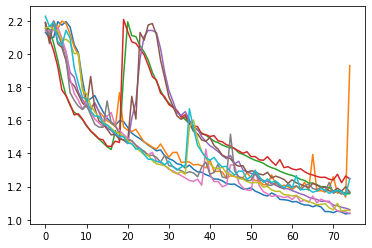

In [16]:
for i in range(k):
    plt.plot(model1.kfcv_histories[i][0])
    plt.plot(model1.kfcv_histories[i][1])

In [17]:
cv_probabilities, cv_predictions, cv_true, cv_comparisons, cv_df = [], [], [], [], []

In [18]:
for i in range(k):
    cv_probabilities.append(model1.kfcv_prob[i])
    cv_predictions.append(model1.kfcv_pred[i])
    cv_true.append(model1.kfcv_true[i])

In [19]:
for i in range(k):
    stack = np.vstack([cv_predictions[i], cv_true[i]]).T
    df = pd.DataFrame(stack)
    cv_comparisons.append(stack)
    cv_df.append(df)

### Accuracies

In [20]:
for df in cv_df:
    print(f'Accuracy: {sum(df[0] == df[1])/len(df)}')
    
print(f'Mean: {np.mean(df[0] == df[1])}')

Accuracy: 0.42580877066858375
Accuracy: 0.5466570812365205
Accuracy: 0.577138749101366
Accuracy: 0.5787203450754853
Accuracy: 0.5496046010064701
Mean: 0.5496046010064701


In [21]:
mean_f1 = pd.DataFrame()

### F1-Scores

In [24]:
total_f1 = pd.DataFrame()

<AxesSubplot:>

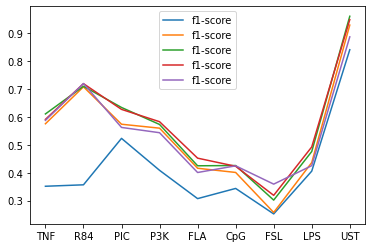

In [25]:
for df in cv_df:
    cr = sklearn.metrics.classification_report(df[0], df[1], target_names=ligands, output_dict=True)
    cr = pd.DataFrame(cr).transpose()
    cr = cr[:9]
    total_f1 = pd.concat([total_f1, cr], axis=1)
    
total_f1.plot(y='f1-score')

<AxesSubplot:>

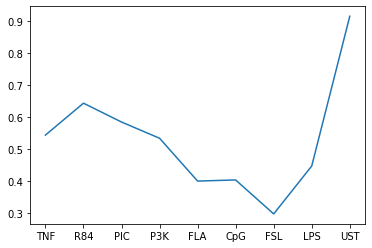

In [28]:
mean_f1 = np.mean(total_f1['f1-score'].transpose())
mean_f1.plot()

In [30]:
print(mean_f1)

TNF    0.543352
R84    0.642920
PIC    0.584181
P3K    0.533546
FLA    0.399992
CpG    0.403459
FSL    0.297543
LPS    0.447035
UST    0.914088
dtype: float64


### Confusion Fractions

In [31]:
fractions, cfs = [], []

In [32]:
for true, probabilities in zip(cv_true, cv_probabilities):
    fractions.append(Fraction(true, probabilities))

<AxesSubplot:>

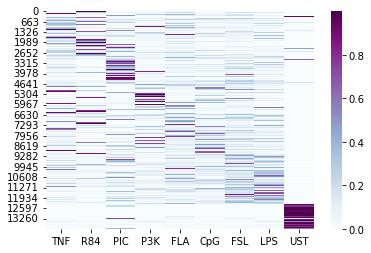

In [33]:
sns.heatmap(fractions[0], cmap='BuPu', xticklabels=ligands)

<AxesSubplot:>

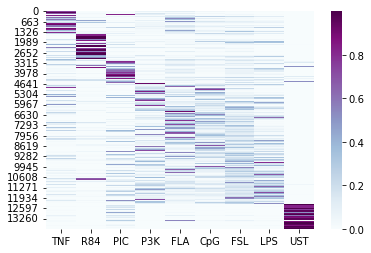

In [34]:
sns.heatmap(fractions[1], cmap='BuPu', xticklabels=ligands)

<AxesSubplot:>

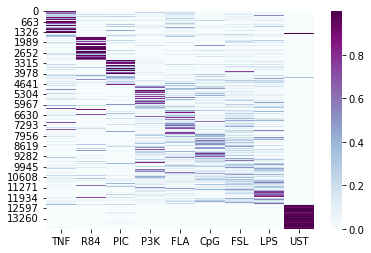

In [35]:
sns.heatmap(fractions[2], cmap='BuPu', xticklabels=ligands)

<AxesSubplot:>

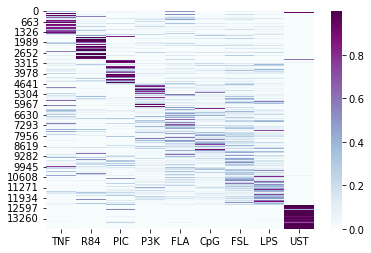

In [36]:
sns.heatmap(fractions[3], cmap='BuPu', xticklabels=ligands)

<AxesSubplot:>

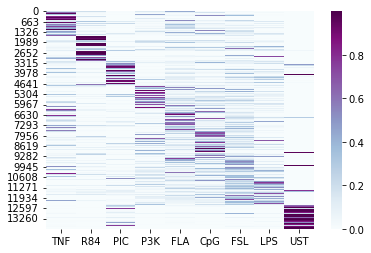

In [37]:
sns.heatmap(fractions[4], cmap='BuPu', xticklabels=ligands)

In [38]:
mean_fraction = np.mean(fractions, axis=0)

<AxesSubplot:>

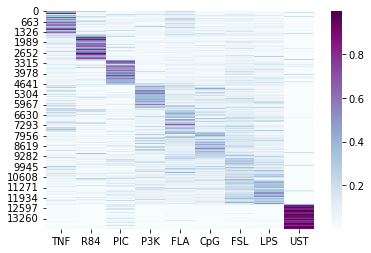

In [39]:
sns.heatmap(mean_fraction, cmap='BuPu', xticklabels=ligands)

## Polarization State Analysis

In [40]:
net = LSTM(input_size, hidden_sizes, output_size, num_layers=num_layers, device=device)
net.train()

LSTM(
  (lstm): LSTM(1, 98, batch_first=True)
  (fc1): Linear(in_features=98, out_features=9, bias=True)
)

In [41]:
model = LSTMTrainer(model=net, device=device)

In [42]:
polarization_data, polar_dataloaders = [], []

In [43]:
for i in polarization:
    polarization_data.append(DatasetPolar(ligands, [i], replicas, size))
    
for data in polarization_data:
    _, dset = torch.utils.data.random_split(data, [11592-3200, 3200])
    load = torch.utils.data.DataLoader(dset, shuffle=True, batch_size=32)
    polar_dataloaders.append(load)

In [44]:
kfcv_p = []

In [45]:
for i in range(1, k+1):
    model.load(load_dir + '1lkfcv' + str(i) + '.pth')
    for data in polar_dataloaders:
        prob, pred, true = model.evaluate(data, batch_size=32, probability_size=9)
        kfcv_p.append([prob, pred, true])

* kfcv_p organized by unpolarized, ib, ig, i0, i3, i4 for all 5 models
* 6 x 5 = 30
* each list in kfcv_p should have a tuple (list) of probabilities, predictions, and labels

In [46]:
print(len(kfcv_p), len(kfcv_p[0]))

30 3


##### Grabbing averages across 5 models for simplicity

In [47]:
polarization_states = [[], [], [], [], [], []]

In [48]:
i = 0
for prob, pred, true in kfcv_p:
    if (i == 0 or i == 6 or i == 12 or i == 18 or i == 24):
        polarization_states[0].append([prob, pred, true])
        
    if (i == 1 or i == 7 or i == 13 or i == 19 or i == 25):
        polarization_states[1].append([prob, pred, true])
        
    if (i == 2 or i == 8 or i == 14 or i == 20 or i == 26):
        polarization_states[2].append([prob, pred, true])
        
    if (i == 3 or i == 9 or i == 15 or i == 21 or i == 27):
        polarization_states[3].append([prob, pred, true])
        
    if (i == 4 or i == 10 or i == 16 or i == 22 or i == 28):
        polarization_states[4].append([prob, pred, true])
        
    if (i == 5 or i == 11 or i == 17 or i == 23 or i == 29):
        polarization_states[5].append([prob, pred, true])
    i += 1

In [49]:
polarization_accuracies = []
polarization_f1 = []
polarization_fraction = []

In [50]:
fractions, dfs, f1s = [], [], []

In [51]:
for i in range(6):
    avgcf = pd.DataFrame()
    for prob, pred, true in polarization_states[i]:
        fraction = Fraction(true, prob)
        fractions.append(fraction)
        
        tab = np.vstack([pred, true]).T
        df = pd.DataFrame(tab)
        acc = sum(df[0] == df[1])/len(df)
        dfs.append(acc)
        
        cf = sklearn.metrics.classification_report(df[0], df[1], target_names=ligands, output_dict=True)
        cf = pd.DataFrame(cf).transpose()
        cf = cf[:9]
        avgcf = pd.concat([avgcf, cf], axis=1)
        
    polarization_fraction.append(np.mean(fractions, axis=0))
    polarization_accuracies.append(np.mean(dfs))
    polarization_f1.append(np.mean(avgcf['f1-score'].transpose()))

In [52]:
print(len(polarization_accuracies), len(polarization_f1), len(polarization_fraction))

6 6 6


##### Accuracies

In [53]:
newline = '\n'
print(f'Unpolarized: {polarization_accuracies[0]} {newline}ib: {polarization_accuracies[1]}{newline}ig: {polarization_accuracies[2]}{newline}i0: {polarization_accuracies[3]}{newline}i3: {polarization_accuracies[4]}{newline}i4: {polarization_accuracies[5]}')

Unpolarized: 0.569125 
ib: 0.5640000000000001
ig: 0.5414166666666667
i0: 0.5418593749999999
i3: 0.5457500000000001
i4: 0.5482083333333334


##### F1-Score

In [54]:
print(f'Unpolarized:{newline}{polarization_f1[0]} {newline}ib:{newline}{polarization_f1[1]}{newline}ig:{newline}{polarization_f1[2]}{newline}i0:{newline}{polarization_f1[3]}{newline}i3:{newline}{polarization_f1[4]}{newline}i4:{newline}{polarization_f1[5]}')    

Unpolarized:
TNF    0.553333
R84    0.652257
PIC    0.746373
P3K    0.503485
FLA    0.437971
CpG    0.396652
FSL    0.290736
LPS    0.540242
UST    0.952085
dtype: float64 
ib:
TNF    0.526169
R84    0.738718
PIC    0.533410
P3K    0.621158
FLA    0.467145
CpG    0.463500
FSL    0.375204
LPS    0.426917
UST    0.909251
dtype: float64
ig:
TNF    0.634057
R84    0.611135
PIC    0.483920
P3K    0.449811
FLA    0.301063
CpG    0.296694
FSL    0.260717
LPS    0.446975
UST    0.947289
dtype: float64
i0:
TNF    0.583418
R84    0.653721
PIC    0.624264
P3K    0.454548
FLA    0.344373
CpG    0.444298
FSL    0.340199
LPS    0.427598
UST    0.947226
dtype: float64
i3:
TNF    0.567276
R84    0.662435
PIC    0.639919
P3K    0.505544
FLA    0.473601
CpG    0.402998
FSL    0.309742
LPS    0.496526
UST    0.897047
dtype: float64
i4:
TNF    0.549281
R84    0.616662
PIC    0.549147
P3K    0.686684
FLA    0.492616
CpG    0.469420
FSL    0.302943
LPS    0.433466
UST    0.877184
dtype: float64


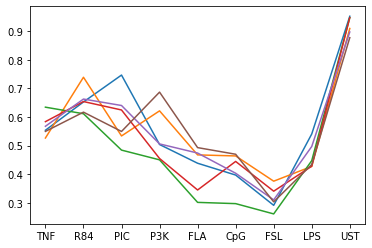

In [55]:
for f1 in polarization_f1:
    f1.plot()
    
# blue = unpolarized, orange = ib, green = ig, red = i0, purple = i3, brown = i4

##### Confusion Fractions

Unpolarized


<AxesSubplot:>

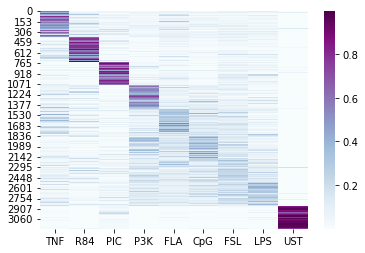

In [56]:
print('Unpolarized')
sns.heatmap(polarization_fraction[0], xticklabels=ligands, cmap='BuPu')

ib


<AxesSubplot:>

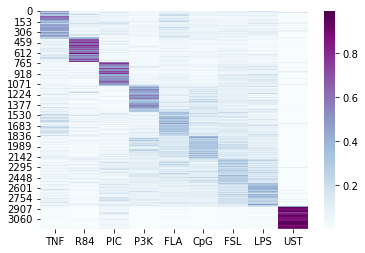

In [57]:
print('ib')
sns.heatmap(polarization_fraction[1], xticklabels=ligands, cmap='BuPu')

ig


<AxesSubplot:>

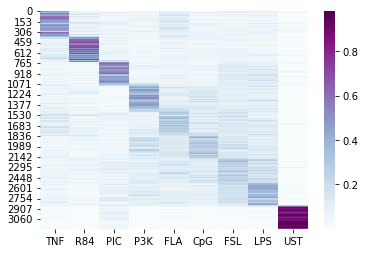

In [58]:
print('ig')
sns.heatmap(polarization_fraction[2], xticklabels=ligands, cmap='BuPu')

i0


<AxesSubplot:>

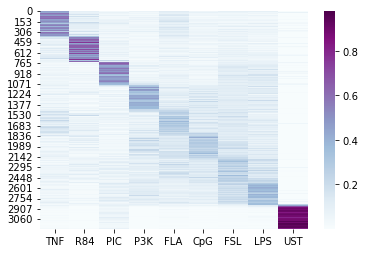

In [59]:
print('i0')
sns.heatmap(polarization_fraction[3], xticklabels=ligands, cmap='BuPu')

i3


<AxesSubplot:>

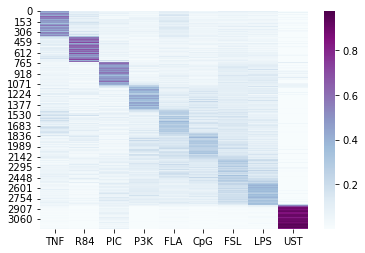

In [60]:
print('i3')
sns.heatmap(polarization_fraction[4], xticklabels=ligands, cmap='BuPu')

i4


<AxesSubplot:>

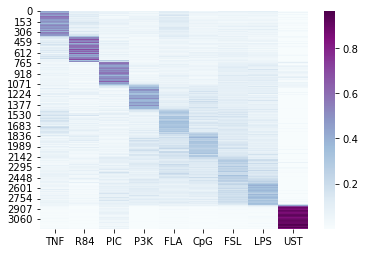

In [61]:
print('i4')
sns.heatmap(polarization_fraction[5], xticklabels=ligands, cmap='BuPu')

### Polarization States across x-axis

In [62]:
ps = pd.DataFrame(polarization_f1)
ps = ps.set_axis(['M0', 'IB', 'IG', 'I0', 'I3', 'I4'])

<AxesSubplot:>

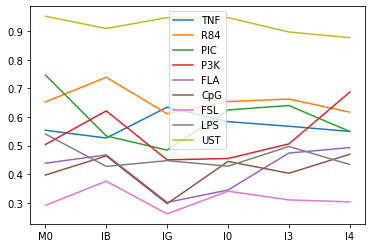

In [63]:
ps.plot()

In [64]:
ps_avg = np.mean(ps, axis=1)

<AxesSubplot:>

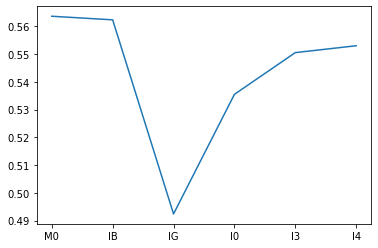

In [65]:
ps_avg.plot()